In [1]:
from simulation import monte_carlo_simulation
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

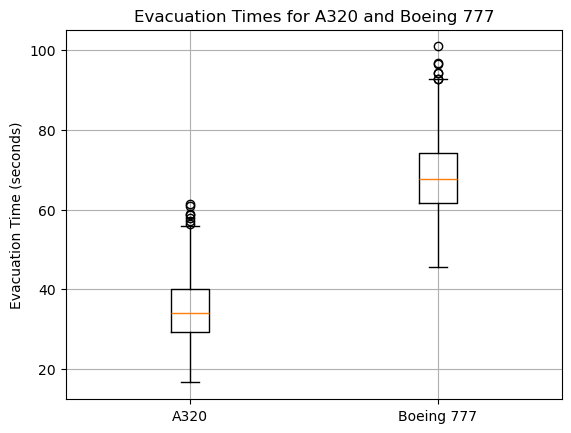

In [4]:
# A320 Configuration
a320_params = {
    "rows": 26,
    "seats_per_row": 3,
    "seats_per_row_front": 2,
    "front_rows": 3,
    "exits": [0, 9, 10, 25],
    "speed_factor": 0.8,
    "proportion_old": 0.3,
    "emergency_level": 0.5,
    "occupancy_rate": 0.8,
    "num_simulations": 1000
}

# Boeing 777 Configuration
boeing777_params = {
    "rows": 48,
    "seats_per_row": 5,
    "seats_per_row_front": 2,
    "front_rows": 16,
    "exits": [0, 8, 20, 34, 47],
    "speed_factor": 0.8,
    "proportion_old": 0.3,
    "emergency_level": 0.5,
    "occupancy_rate": 0.8,
    "num_simulations": 1000
}

# Run simulations
a320_times = monte_carlo_simulation(**a320_params)
boeing777_times = monte_carlo_simulation(**boeing777_params)

# Visualize results
plt.boxplot([a320_times, boeing777_times], labels=["A320", "Boeing 777"])
plt.title("Evacuation Times for A320 and Boeing 777")
plt.ylabel("Evacuation Time (seconds)")
plt.grid(True)
plt.show()

In [5]:
# Perform t-test to check significance
t_stat, p_value = ttest_ind(a320_times, boeing777_times)

# Results summary
print(f"A320 - Average Evacuation Time: {np.mean(a320_times):.2f} seconds, Std Dev: {np.std(a320_times):.2f}")
print(f"Boeing 777 - Average Evacuation Time: {np.mean(boeing777_times):.2f} seconds, Std Dev: {np.std(boeing777_times):.2f}")
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("The difference in evacuation times between the A320 and Boeing 777 is statistically significant.")
else:
    print("The difference in evacuation times between the A320 and Boeing 777 is not statistically significant.")

A320 - Average Evacuation Time: 34.95 seconds, Std Dev: 7.75
Boeing 777 - Average Evacuation Time: 68.12 seconds, Std Dev: 8.77
T-Statistic: -89.60, P-Value: 0.0000
The difference in evacuation times between the A320 and Boeing 777 is statistically significant.
